In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X, y = make_classification(
   n_samples=1000,      
   n_features=10,      
   n_informative=7,    
   n_redundant=2,       
   n_classes=2,       
   random_state=42
)
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
df["target"] = y
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,-1.147202,-1.670851,1.371919,1.267551,0.764752,0.573700,-1.598491,-0.557015,4.353265,-0.963871,0
1,-1.191387,-2.285686,1.320717,2.227457,-0.609110,1.084255,-4.219594,0.758810,-1.429300,0.369956,0
2,-3.897259,-3.413537,10.155710,-1.069622,4.479522,-2.298346,-2.610669,-1.311350,-1.198817,0.062056,1
3,-0.685142,3.243428,-5.077643,-0.016700,-1.558793,-0.045471,-0.531895,-1.099699,0.656782,1.604889,0
4,-2.423254,-0.430341,0.323621,-0.774068,0.124669,-0.408451,-2.544363,-1.762523,-0.556955,2.943371,0


Точність моделі: 0.805

Класифікаційний звіт:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       100
           1       0.81      0.79      0.80       100

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200



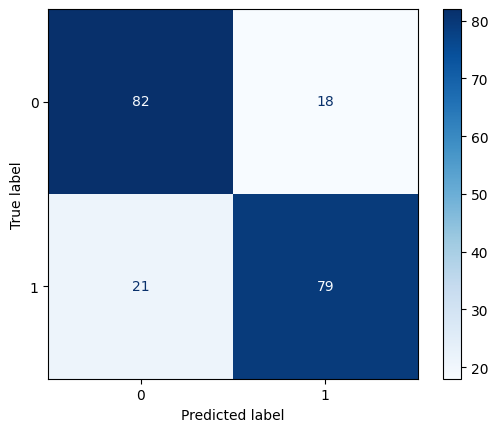

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_s, y_train)

y_pred = model.predict(X_test_s)
acc = accuracy_score(y_test, y_pred)
print("Точність моделі:", acc)

print("\nКласифікаційний звіт:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()